In [1]:
import os
import glob

import pandas as pd
import numpy as np



In [2]:
# Open datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [3]:
data_20.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc'],
      dtype='object')

In [5]:
for df in dfs:
    
    df['GDM_inc'] = 'low'
    df.loc[df['DM_inc']>25,'GDM_inc']= 'high'
    
    df['GDM_sev'] = 'low'
    df.loc[df['DM_severity']>10,'GDM_sev']= 'high'
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.65'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.229e+03
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.764e-01 U_stat=9.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.376e-01 U_stat=1.117e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.601e-06 U_stat=1.576e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.584e-01 U_stat=1.750e+02


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


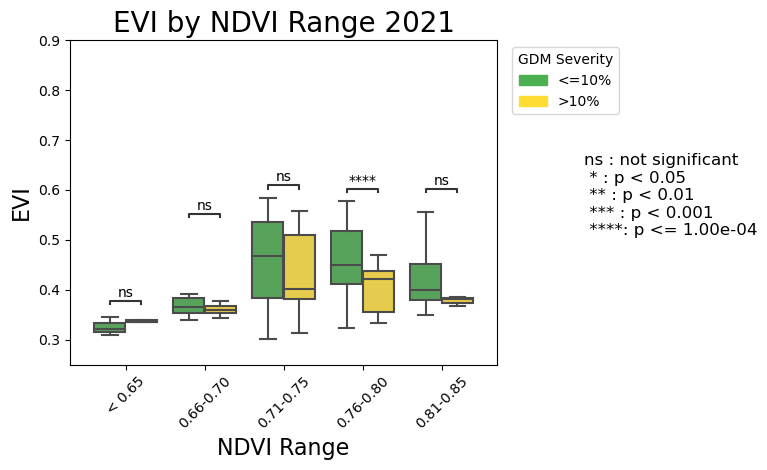

In [42]:
#Severity 2021
x = "ndvi_group"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_sev_2021_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.718e-01 U_stat=1.982e+03
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.796e-02 U_stat=5.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.607e-14 U_stat=2.593e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.348e-56 U_stat=6.436e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.872e-11 U_stat=1.319e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


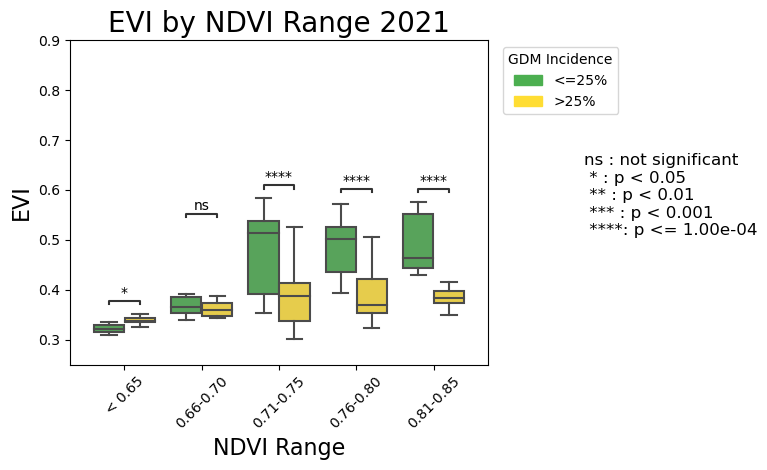

In [43]:
#Incidence 2021

x = "ndvi_group"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
    #((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2021_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.873e-02 U_stat=5.420e+02
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.029e-03 U_stat=9.750e+02


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


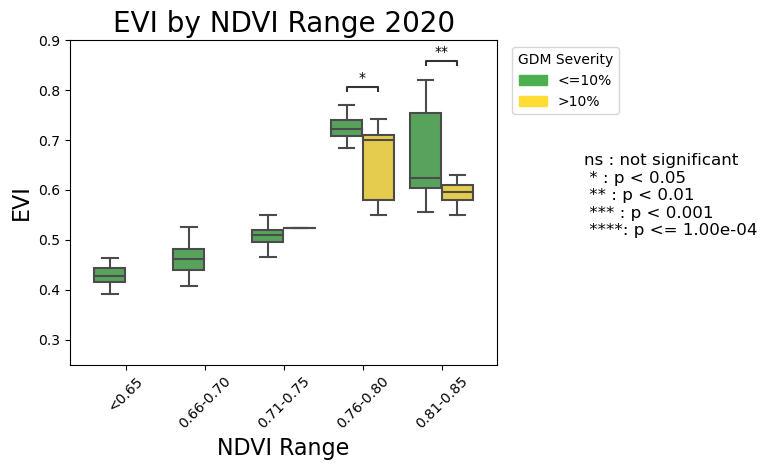

In [44]:
#Severity 2020

x = "ndvi_group"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#      ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_sev_2020_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.485e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.027e-04 U_stat=1.300e+01
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.075e-02 U_stat=9.230e+02
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.360e-02 U_stat=1.558e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


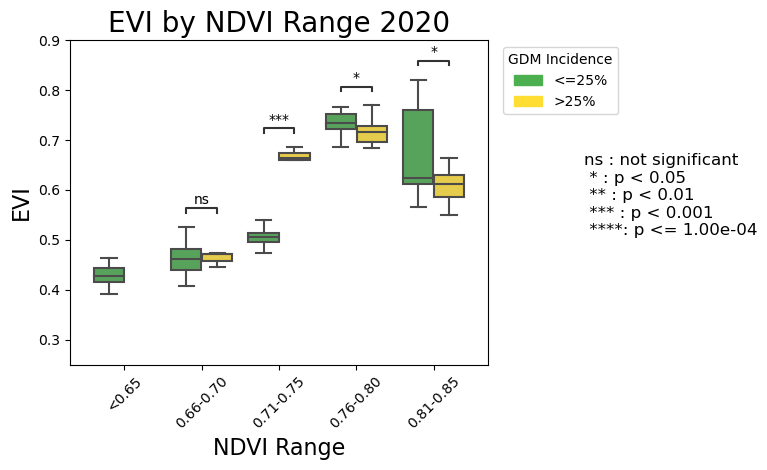

In [45]:
#Incidence 2020

x = "ndvi_group"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2020_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.100e+01
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.500e-02 U_stat=5.190e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.540e+02


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


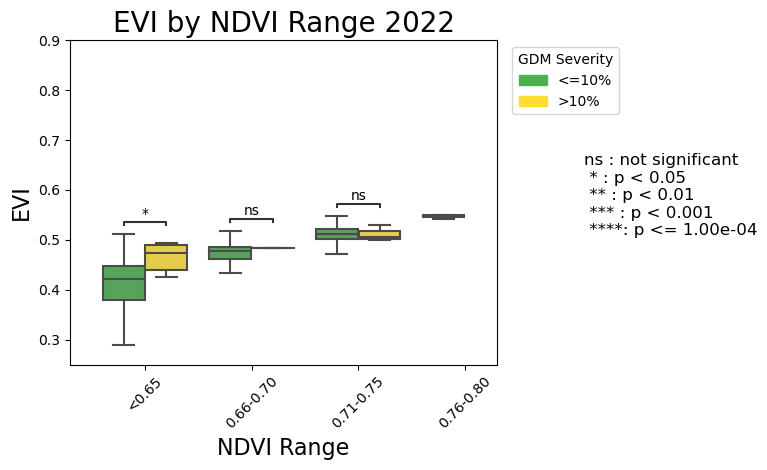

In [46]:
x = "ndvi_group"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()

# plt.savefig("fig3_sev_2022_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.300e+01
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.037e-03 U_stat=1.329e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.620e+02
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.000e+00


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


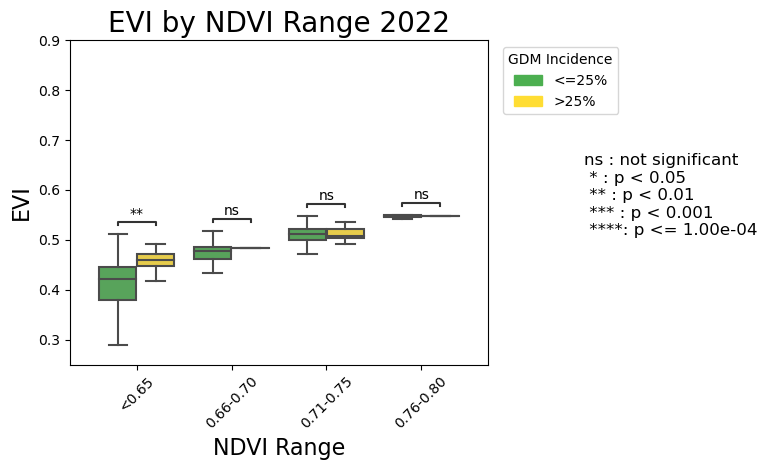

In [47]:
#Incidence 2022
x = "ndvi_group"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'],
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2022_fullrange.svg")

## EVI by Date


In [22]:
data_20.acquired.unique()

array([20200618, 20200625, 20200710, 20200805, 20200812])

In [26]:
data_20.Date.unique()

array(['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.172e-01 U_stat=4.660e+02
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.910e-04 U_stat=1.208e+03


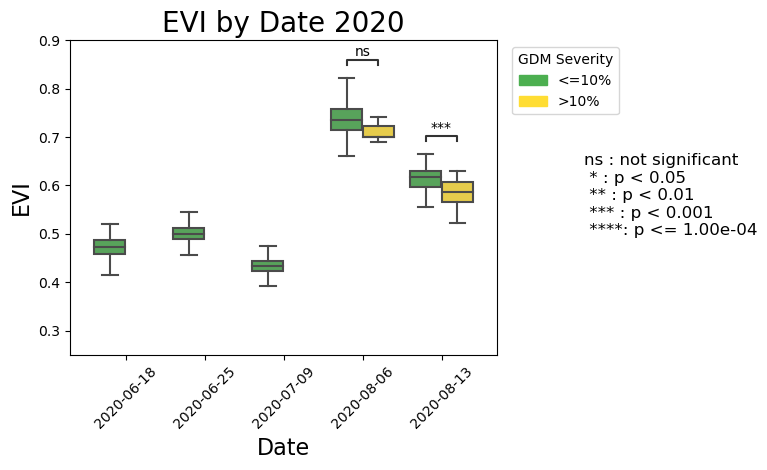

In [48]:
#Severity 2020

x = "Date"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
      ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.341e-04 U_stat=1.758e+03
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.256e-02 U_stat=1.618e+03


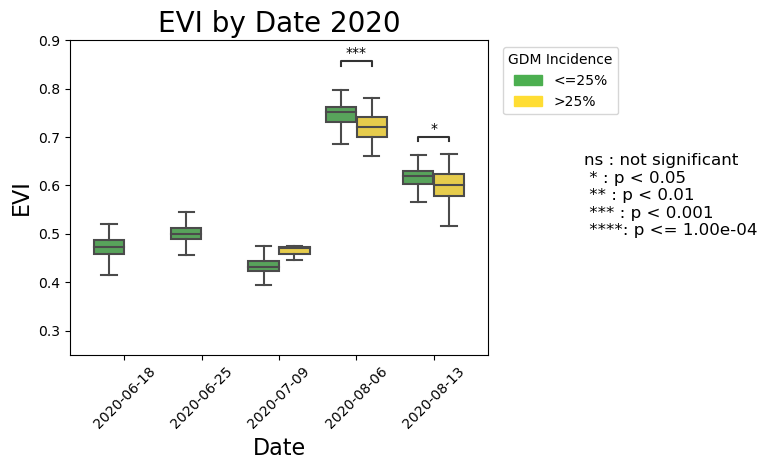

In [49]:
#Inc 2020

x = "Date"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2020.svg")

In [36]:
data_21.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.819e-02 U_stat=3.463e+03
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.671e-01 U_stat=4.109e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.043e+03


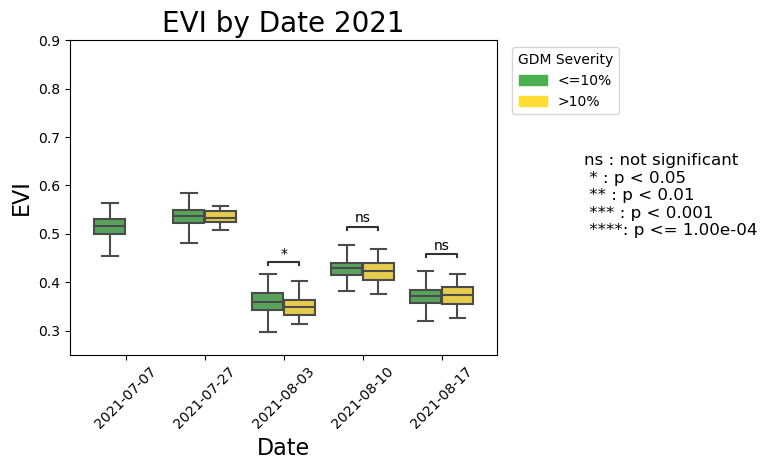

In [50]:
#Severity 2021

x = "Date"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10','2021-08-17'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.996e+03
2021-07-07_low v.s. 2021-07-07_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.510e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.004e-01 U_stat=4.463e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.074e-02 U_stat=4.329e+03


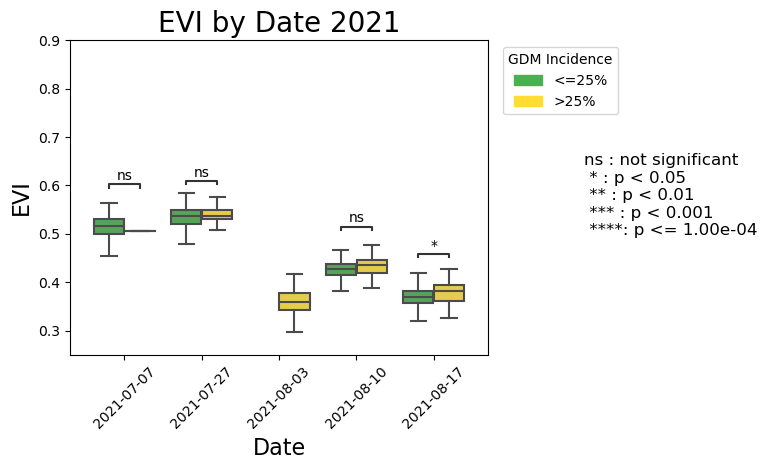

In [51]:
#Inc 2021

x = "Date"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10','2021-08-17']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10','2021-08-17'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2021.svg")

In [33]:
data_22.Date.unique()

array(['2022-06-22', '2022-07-06', '2022-07-20'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-06_low v.s. 2022-07-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.370e-01 U_stat=4.680e+02
2022-07-20_low v.s. 2022-07-20_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.590e+02


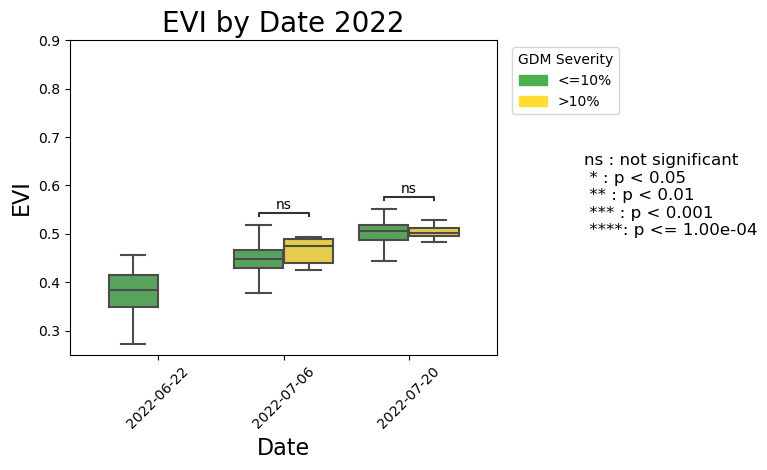

In [52]:
#Severity 2022

x = "Date"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2022.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-06_low v.s. 2022-07-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.461e-01 U_stat=1.006e+03
2022-07-20_low v.s. 2022-07-20_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.697e-01 U_stat=1.111e+03


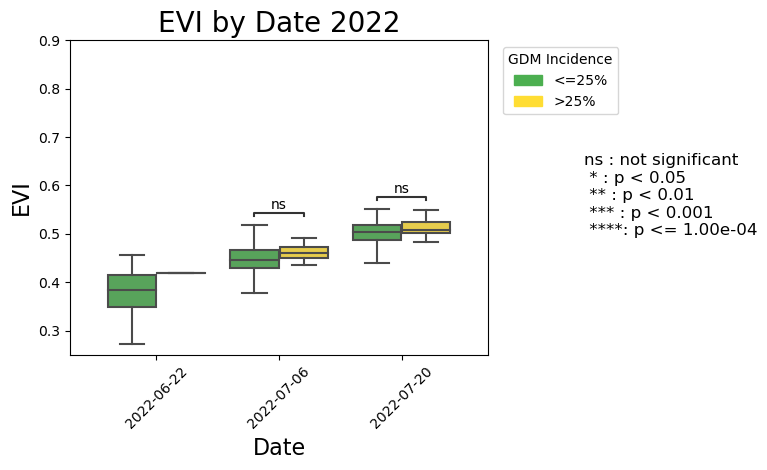

In [53]:
#Inc 2022

x = "Date"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
#sns.set(font="Tahoma")

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2022.svg")

In [60]:
# Check how many weeks of scout data each year

scout_20 = pd.read_csv('../data/scout/scout_2020_gdf.csv')
scout_21 = pd.read_csv('../data/scout/scout_2021_gdf.csv')
scout_22 = pd.read_csv('../data/scout/scout_2022_gdf.csv')


In [61]:
len(scout_20.Date.unique())

11

In [62]:
len(scout_21.Date.unique())

8

In [63]:
len(scout_22.Date.unique())

9

In [69]:
print('First scout date 2020:', scout_20.Date.unique()[0])
print('Last scout date 2020:', scout_20.Date.unique()[10])

First scout date 2020: 2020-06-18
Last scout date 2020: 2020-09-09


In [68]:
print('First scout date 2021:', scout_21.Date.unique()[0])
print('Last scout date 2021:', scout_21.Date.unique()[7])

First scout date 2021: 2021-06-24
Last scout date 2021: 2021-08-17


In [67]:
print('First scout date 2022:', scout_22.Date.unique()[0])
print('Last scout date 2022:', scout_22.Date.unique()[8])

First scout date 2022: 2022-06-22
Last scout date 2022: 2022-08-29
